In [119]:
# Nick Fogg
# CSC 295-02
# 11/21/2023
# ML notebook that compares 3 different classifiers: logistic regression, kNN, and SVC
# on hand-drawn digits testing computer vision from MNIST database.

In [120]:
# load packages
# assist loading the dataset
import matplotlib.image as mpimg
# for logistic regression classifier
from sklearn.linear_model import LogisticRegression
# for k nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# for svm classifier
from sklearn.svm import LinearSVC
# bonus packages
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [121]:
# load train_dataset

train_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'train', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to train_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            train_dataset.append((image, label))

#load test_dataset

test_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    img_path = os.path.join('./data', 'test', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        if image.shape == (28, 28):
            test_dataset.append((image, label))

print('The number of Training Data: ', len(train_dataset))
print('The number of Testing Data: ', len(test_dataset))
print('The size of images: ', train_dataset[0][0].shape)

The number of Training Data:  60000
The number of Testing Data:  10000
The size of images:  (28, 28)


In [122]:
# convert training images into vectors for training data
train_image_array = np.empty((len(train_dataset), 784))
for i in range(len(train_dataset)):
    image = train_dataset[i][0]
    train_image_array[i] = image.flatten()
# separate labels into new array for training data
train_label_array = np.empty((len(train_dataset)))
for i in range(len(train_dataset)):
    label = train_dataset[i][1]
    train_label_array[i] = label

# convert training images into vectors for testing data
test_image_array = np.empty((len(test_dataset), 784))
for i in range(len(test_dataset)):
    image = test_dataset[i][0]
    test_image_array[i] = image.flatten()
# separate labels into new array for testing data
test_label_array = np.empty((len(test_dataset)))
for i in range(len(test_dataset)):
    label = test_dataset[i][1]
    test_label_array[i] = label



In [123]:
# train the classifier (logistic regression)
model_lr = LogisticRegression(multi_class='multinomial', max_iter=200).fit(train_image_array, train_label_array)
pred_lr = model_lr.predict(test_image_array)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
# determine accuracy (logistic regression)
score_lr = accuracy_score(test_label_array, pred_lr)
score_lr
# score_lr accuracy = 92.25%

0.9225

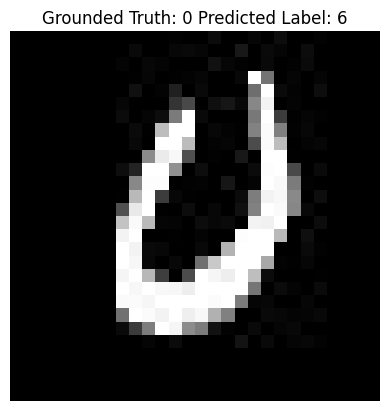

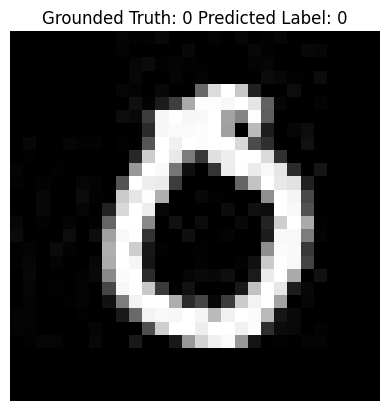

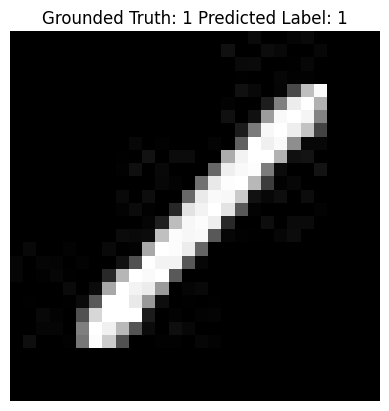

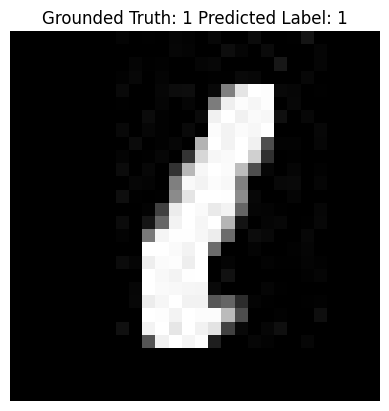

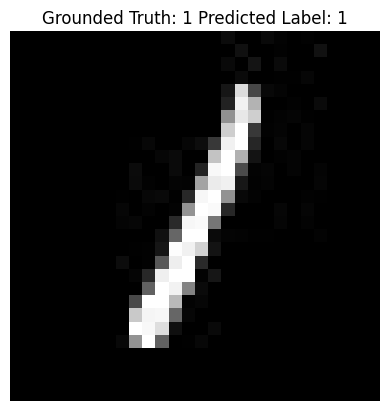

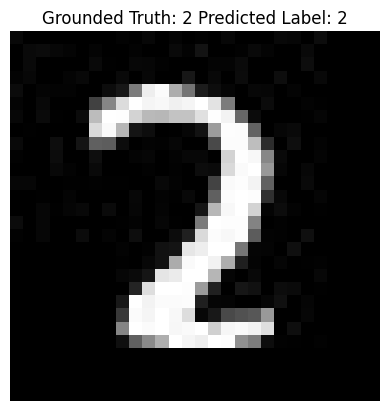

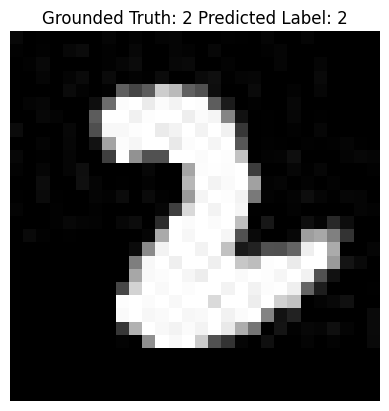

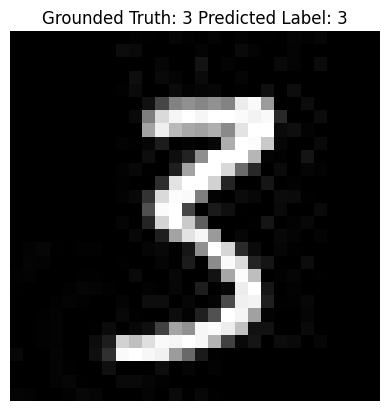

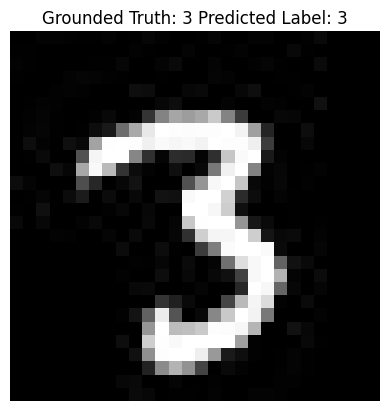

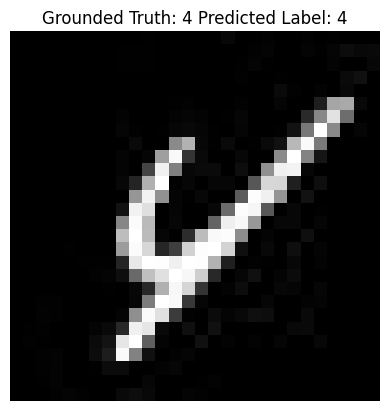

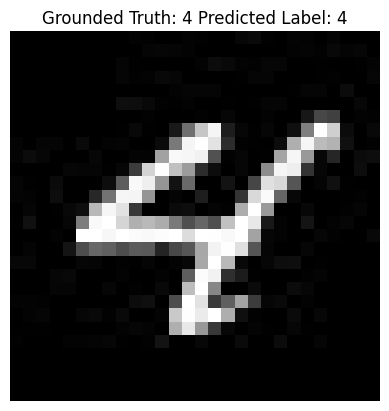

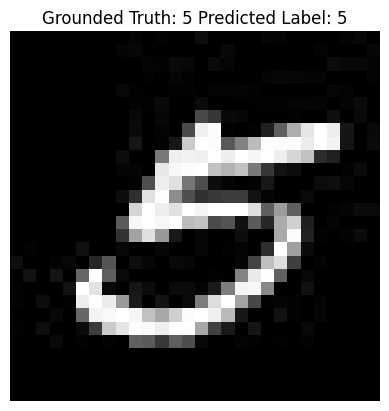

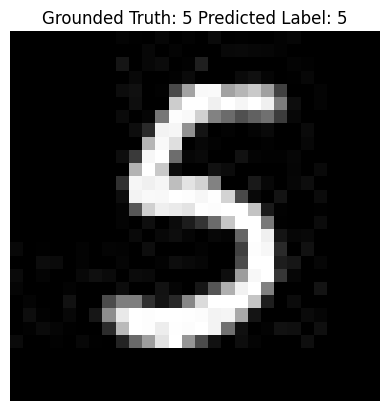

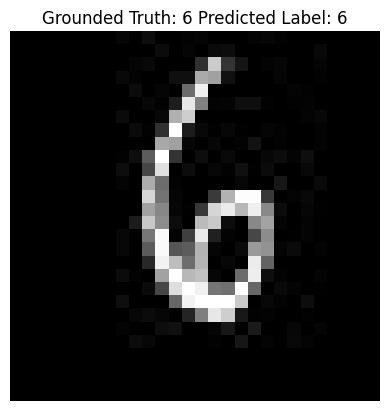

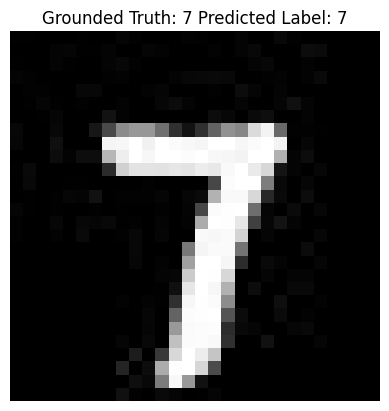

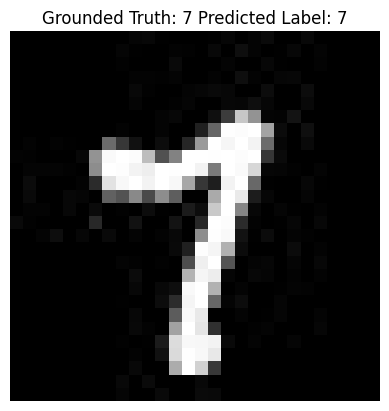

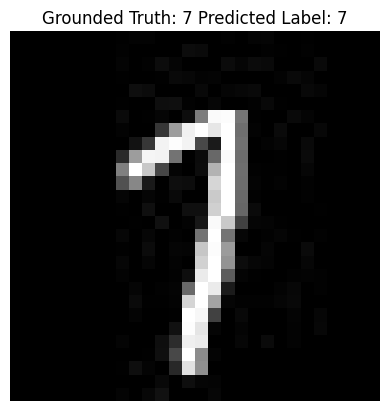

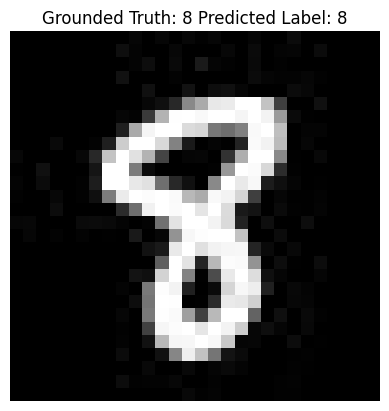

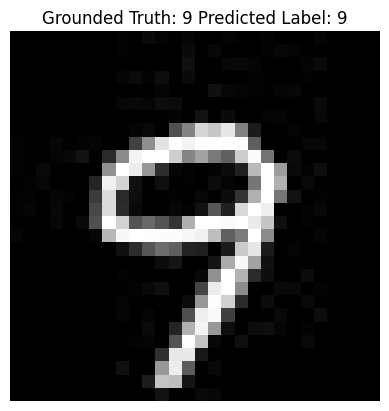

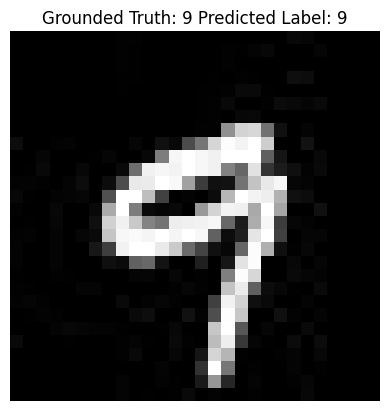

In [125]:
# display every 500th image (logistic regression)
for i in range(len(test_dataset)):
    if i % 500 == 0:
        plt.imshow(test_dataset[i][0], cmap="gray")
        name = f"Grounded Truth: {test_dataset[i][1]} Predicted Label: {int(pred_lr[i])}"
        plt.title(name)
        plt.axis('off')
        plt.show()

In [126]:
# train the classifier (k nearest neighbors)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(train_image_array, train_label_array)
# pred_knn = knn.predict(test_image_array)

In [127]:
# determine accuracy (k nearest neighbors)

# score_knn = accuracy_score(test_label_array, pred_knn)
# score_knn
# score_knn = 96.98%

In [128]:
# display every 500th image (k nearest neighbors)

# for i in range(len(test_dataset)):
#     if i % 500 == 0:
#         plt.imshow(test_dataset[i][0], cmap="gray")
#         name = f"Grounded Truth: {test_dataset[i][1]} Predicted Label: {int(pred_knn[i])}"
#         plt.title(name)
#         plt.axis('off')
#         plt.show()

In [129]:
# train the classifier (svc)

# svc = LinearSVC()
# svc.fit(train_image_array, train_label_array)
# pred_svc = svc.predict(test_image_array)

In [130]:
# determine accuracy (svc)

# score_svc = accuracy_score(test_label_array, pred_svc)
# score_svc
# score_svc = 88.27%

In [131]:
# display every 500th image (svc)

# for i in range(len(test_dataset)):
#     if i % 500 == 0:
#         plt.imshow(test_dataset[i][0], cmap="gray")
#         name = f"Grounded Truth: {test_dataset[i][1]} Predicted Label: {int(pred_svc[i])}"
#         plt.title(name)
#         plt.axis('off')
#         plt.show()

In [132]:
# Findings:

# The performance of these classifiers can be based on two factors being accuracy and 
# run time. Logistic regression model has a medium runtime of about 5 minutes 37 seconds,
# and a medium accuracy as well at 92.25%. The K nearest neighbors classifier is better
# in both regards for this dataset, with a runtime of around 6 seconds and accuracy of
# 96.98%. Contrasting this, the svc model is worse in both aspects, most likely due to
# the dataset. It has a runtime of 2 minutes and 46 seconds and an accuracy of 88.27%.

# I believe kNN had a better performance because of the nature of the data. The numbers
# that are trained and tested all share similarities in between each label. KNN can take
# advantage of this grouping as white pixel patterns for one zero will be similar to the
# pixel patterns for a different zero, even if not exact. This is because the data is
# cleaned to have use solid coloring and centered images. Logistic regression had a good
# performance as well due to its strength in working with numerical data. Being able to
# compare the pixel arrays from one digit to the next and fit them to the training is a
# good task for this classifier. I believe svm struggled in this dataset because of the
# 1 dimensionality of the data. The pixel array is a 1D array and the important parts of
# the data is the entirely white pixels that make up the bulk of the number. This would
# imply there is less for the svc classifier to work with.